# Basic Numba

In [1]:
from utiliviz import register_magic
register_magic(setup_bokeh=True)

Loading BokehJS ...

In [2]:
from numba import njit

## Matrix-Vector Multiplication

In [3]:
def matvecmul(A, x):
    return A * x

@njit
def jit_matvecmul(A, x):
    return A * x

In [4]:
import numpy as np

### Making the data

In [5]:
A = np.random.random((100000, 2000))
x = np.random.random(A.shape[1])

### Testing the non-JIT version

In [6]:
expect = matvecmul(A, x)
np.linalg.norm(expect)

4725.581516391753

### Testing the JIT version

In [7]:
got = jit_matvecmul(A, x)
np.linalg.norm(got)

4725.581516391753

### Profiling the non-JIT version

In [8]:
%%utiliviz
%%time
r = matvecmul(A, x)

CPU times: user 480 ms, sys: 108 ms, total: 588 ms
Wall time: 352 ms


### Profiling the JIT version

In [9]:
%%utiliviz
%%time
r = jit_matvecmul(A, x)

CPU times: user 224 ms, sys: 72 ms, total: 296 ms
Wall time: 294 ms


### Visualize the generated machine code

In [10]:
import graphviz as gv
import IPython.display as display

cfgdot = jit_matvecmul.inspect_cfg(jit_matvecmul.signatures[0])
src = gv.Source(cfgdot)
display.Image(data=src.pipe('png'), width=500)

----

# Working with list

In [11]:
def take_in_range(seq, begin, end):
    """Find values that are between (begin, end) from
    an unordered sequence and
    return them in a sorted order.
    """
    alist = list(seq)
    alist.sort()
    out = [v for v in alist if begin <= v <= end]
    return out

In [12]:
seq = np.random.randint(0, 500, 2000000)
seq

array([160,  73, 209, ..., 208, 283, 131])

In [13]:
out = take_in_range(seq, 11, 32)
"[{} ... {}]".format(', '.join(map(str, out[:3])), ', '.join(map(str, out[-3:])))

'[11, 11, 11 ... 32, 32, 32]'

In [14]:
jit_take_in_range = njit(take_in_range)

### Verify

In [15]:
expect = jit_take_in_range(seq, 14, 310)
got = jit_take_in_range(seq, 14, 310)
assert got == expect

### Compare

In [16]:
%%utiliviz
%%time
_ = take_in_range(seq, 15, 121)

CPU times: user 1.75 s, sys: 8 ms, total: 1.76 s
Wall time: 1.76 s


In [17]:
%%utiliviz
%%time
_ = jit_take_in_range(seq, 15, 121)

CPU times: user 180 ms, sys: 12 ms, total: 192 ms
Wall time: 193 ms


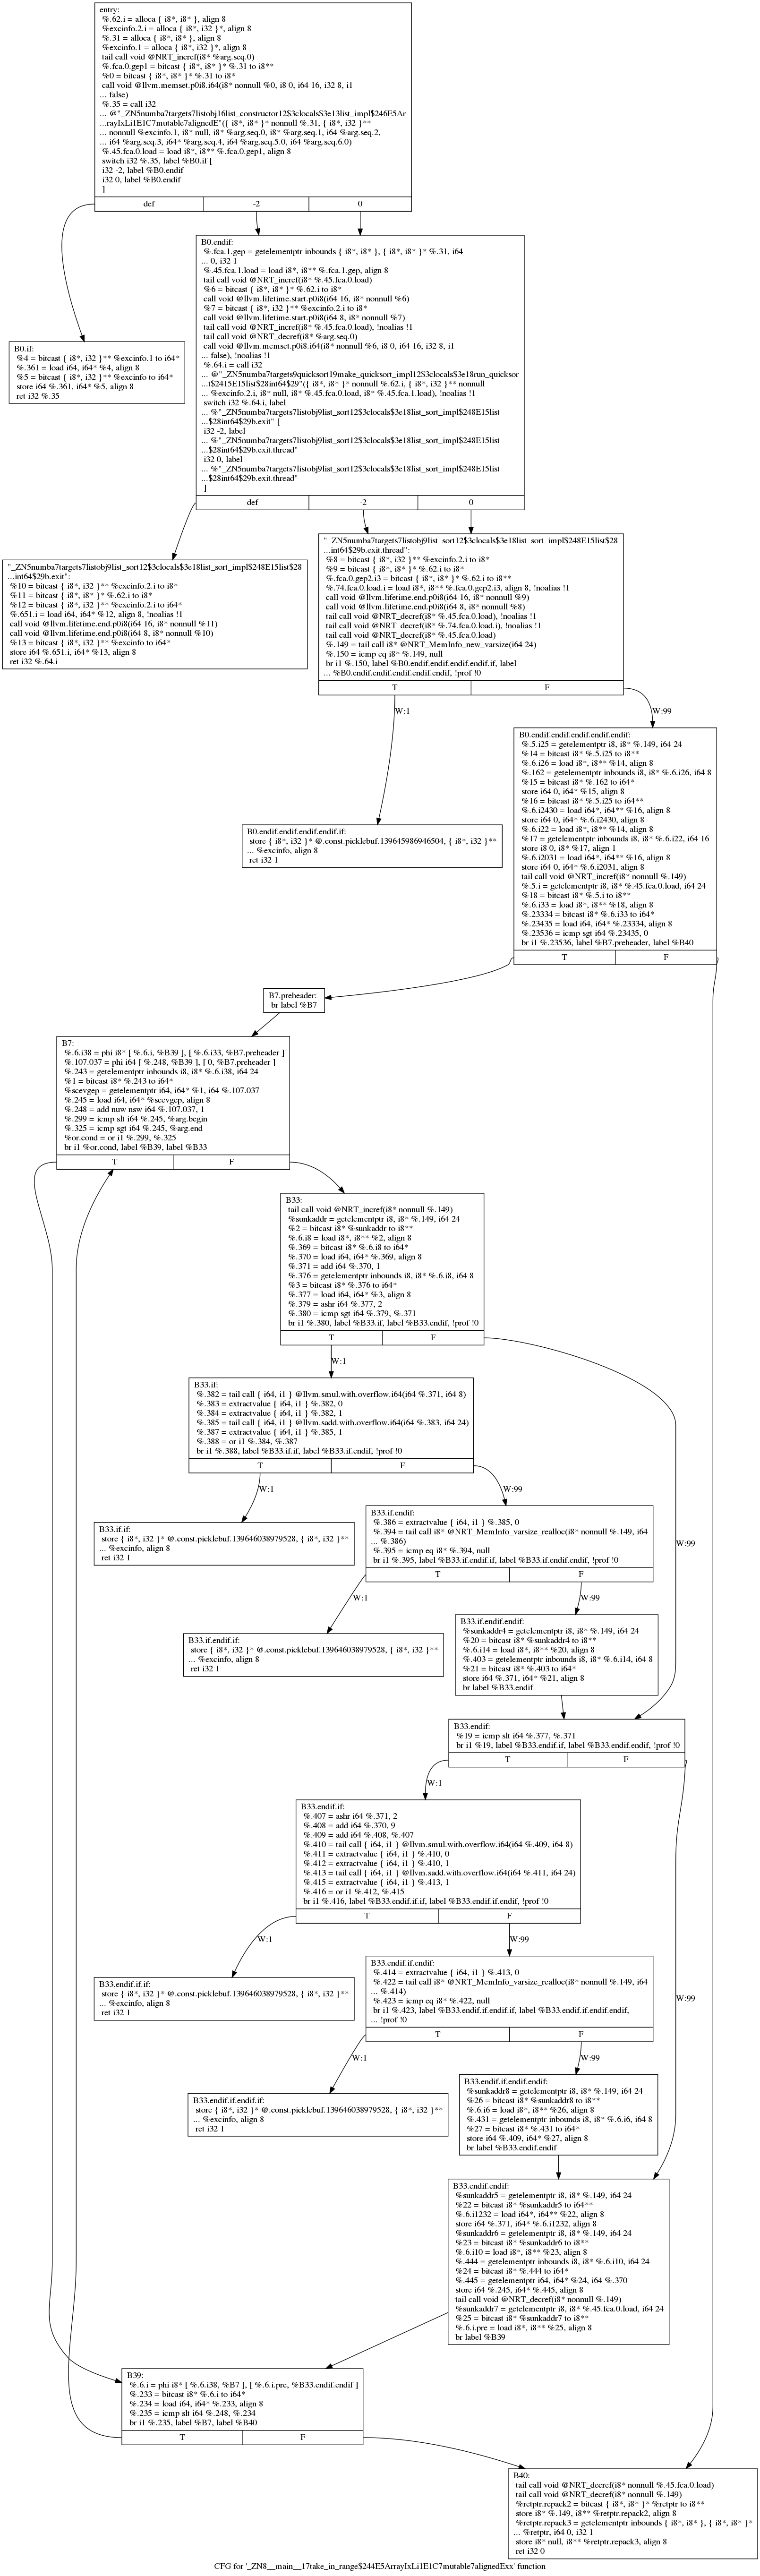

In [18]:
import graphviz as gv
import IPython.display as display

cfgdot = jit_take_in_range.inspect_cfg(jit_take_in_range.signatures[0])
src = gv.Source(cfgdot)
display.Image(data=src.pipe('png'), width=400)